# Timeline Graph

In [3]:
import json

### Writting data into a file

In [4]:
data = {}

data['people'] = []
data['people'].append({
    'name': 'Scott',
    'website': 'stackabuse.com',
    'from': 'Nebraska'
})

data['people'].append({
    'name': 'Larry',
    'website': 'google.com',
    'from': 'Michigan'
})

In [5]:
with open(ROOT_DIR+'/CF_data/synthese/test_json.json', 'w') as outfile:
    json.dump(data, outfile)

### Reading a file

In [11]:
with open(ROOT_DIR+'/CF_data/synthese/graph_event.json') as file:
    data=json.load(file)

### Plot a timeline

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

In [13]:
data[0]['label']='Chauffe simulateur'
data

[{'label': 'Chauffe simulateur',
  'event_start': '2018-05-29 08:00:00',
  'event_end': '2018-05-29 20:00:00',
  'facecolor': 'orange',
  'alpha': 0.5},
 {'label': 'Décapage',
  'event_start': '2019-03-16 08:00:00',
  'event_end': '2019-03-18 23:59:59',
  'facecolor': '#63b2ef',
  'alpha': 0.75},
 {'label': 'Injection Tween 80',
  'event_start': '2019-04-25 10:00:00',
  'event_end': '2019-04-25 15:00:00',
  'facecolor': '#2ca02c',
  'alpha': 0.5},
 {'label': 'Forage série 100',
  'event_start': '2019-09-23 08:00:00',
  'event_end': '2019-10-02 23:59:59',
  'facecolor': '#3399aa',
  'alpha': 0.75},
 {'label': 'Forage série 200, 300 et 400',
  'event_start': '2019-10-08 08:00:00',
  'event_end': '2019-10-15 23:59:59',
  'facecolor': '#33aa99',
  'alpha': 0.75},
 {'label': 'Remblayage',
  'event_start': '2019-10-31 08:00:00',
  'event_end': '2019-11-26 23:59:59',
  'facecolor': '#f3b2eb',
  'alpha': 0.75},
 {'label': 'Chauffe pilote',
  'event_start': '2020-01-31 08:00:00',
  'event_end':

In [14]:
start = []
end = []
labels = []

for item in data:
    start.append(item['event_start'].split(" ")[0])
    end.append(item['event_end'].split(" ")[0])
    labels.append(item['label'][0:50])# Convert date strings (e.g. 2014-10-18) to datetime
start = [datetime.strptime(d, "%Y-%m-%d") for d in start]
end = [datetime.strptime(d, "%Y-%m-%d") for d in end]

<IPython.core.display.Javascript object>


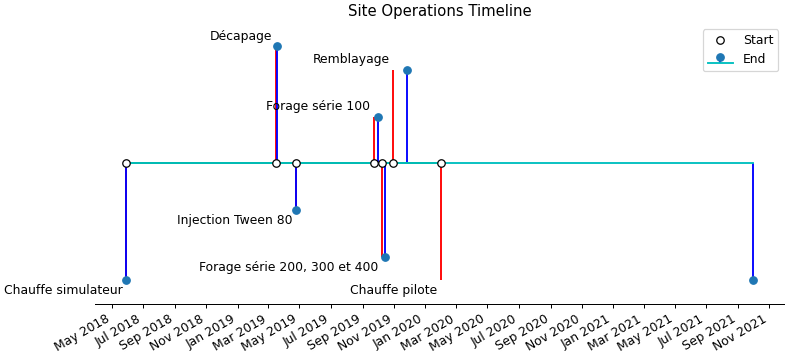

In [15]:
%matplotlib notebook
# Choose some nice levels
levels = np.tile([-5, 5, -2, 2, -4, 4],
                 int(np.ceil(len(start)/6)))[:len(start)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
ax.set(title="Site Operations Timeline")

startline, stemline, baseline = ax.stem(start, levels,linefmt="r-", basefmt="g-",
                                         use_line_collection=True)


endline = ax.stem(end, levels, linefmt="b-", basefmt="c-", use_line_collection=True)


plt.setp(startline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
startline.set_ydata(np.zeros(len(start)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]

for d, l, r, va in zip(start, levels, labels, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with x month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=2))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)

for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

startline.set_label('Start')
endline.set_label('End')
    
ax.margins(y=0.1)
ax.legend() 
plt.show()

 TODO : color the base line for each operation time took (as an interval)

<IPython.core.display.Javascript object>


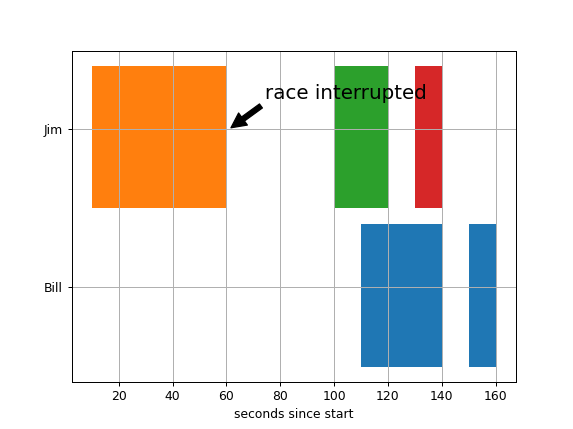

In [16]:
fig, ax = plt.subplots()
ax.broken_barh([(110, 30), (150, 10)], (10, 9), facecolors='tab:blue')
ax.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9), facecolors=('tab:orange', 'tab:green', 'tab:red'))
#ax.set_ylim(5, 35)
#ax.set_xlim(0, 200)
ax.set_xlabel('seconds since start')
ax.set_yticks([15, 25])
ax.set_yticklabels(['Bill', 'Jim'])
ax.grid(True)
ax.annotate('race interrupted', (61, 25), xytext=(0.8, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')

plt.show()

### EXCEL files search

In [17]:
import re
from os import walk
import openpyxl as pxl, xlrd as xl
import pandas as pd
from definitions import ROOT_DIR

In [18]:
myDir=ROOT_DIR+"/CF_data/"
xlsx, xls=[], []
for path, dirs, files in walk(myDir):
    with open("Excel_files.txt", "w+") as txt:
        for f in files:
            if f[0]!='.' and re.compile(r".+\.(xlsx)").match(f) and f is not None:
                xlsx.append('{}'.format(path+"/"+f))
            elif f[0]!='.' and re.compile(r".+\.(xls)").match(f) and f is not None:
                xls.append('{}'.format(path+"/"+f))

In [19]:
resume=pd.DataFrame(columns=['File', 'NbSheets', 'ShNames'])
idx=0
for f in xlsx :
    idx+=1
    resume.loc[idx, 'File']=f.replace(ROOT_DIR+'/CF_data', '..')
    sh = pxl.load_workbook(f).sheetnames
    resume.loc[idx, 'NbSheets']=len(sh)
    resume.loc[idx, 'ShNames']=str(sh).lstrip("['").rstrip("']").replace("'", "")

/home/yanathan/.local/share/virtualenvs/GSDMA-DRfwm83x/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [20]:
idx=len(resume)
for f in xls :
    idx+=1
    resume.loc[idx, 'File']=f.replace(ROOT_DIR+'/CF_data', '..')
    sh = xl.open_workbook(f).sheet_names()
    resume.loc[idx, 'NbSheets']=len(sh)
    resume.loc[idx, 'ShNames']=str(sh).lstrip("['").rstrip("']").replace("'", "")
resume

,File,NbSheets,ShNames
1,../Data_SITEREM/Resultats_Siterem_SOL.xlsx,2,"SOL T1 pilote, Résult SOL ext. pilote"
2,../Data_SITEREM/Resultats_Siterem_eau_extensio...,3,"Résult EAU, param. physico, inorganiques et co..."
3,../Data_SITEREM/Liste XY investigations.xlsx,4,"EAU RB, EAU ALL, EAU PR, SOL"
4,../Data_SITEREM/Resultats_Siterem_eau_pilote_j...,3,"Résult EAU, param. physico, inorganiques et co..."
5,../Data_UMONS/Logs_forages_vUmons_2018-03-20.xlsx,19,"Naphta, Forages, tranchées, Synthèse, Forages_..."
6,../Data_UMONS/geometrie_electrodes_et_sondes/N...,2,"Notes, Nivellement"
7,../Data_UMONS/geometrie_electrodes_et_sondes/F...,2,"Notes_terrain, leve"
8,../Data_UMONS/geometrie_electrodes_et_sondes/S...,2,"cables, Feuil1"
9,../Data_UMONS/Synth_forages/Organisation_donné...,5,"Entete, Global_Ech, Global_Ouv, Normes, Global"
10,../Data_UMONS/ouvrages/profondeur de contact c...,1,Feuil1


In [21]:
resume.to_excel(ROOT_DIR+'/CF_data/synthese/Excel_Files_list.xlsx', index=False)

# Gantt Graph

In [4]:
import pandas as pd
import numpy as np
import altair as alt
from definitions import ROOT_DIR
#alt.renderers.enable('notebook') # if in jupyter

In [5]:
df = pd.read_csv(ROOT_DIR+'/CF_data/synthese/My_tasks.csv', delimiter=";")
df

,Task Name,Start date,End date,Ressources,Progress %
1,Data type handling / Auto Inference,2019-07-01 00:00:00,2019-07-31 00:00:00,Backend,15
2,Sklearn & other models,2019-07-01 00:00:00,2019-07-31 00:00:00,Models,5
3,Optimize Dockerfile,2019-07-01 00:00:00,2019-07-31 00:00:00,CI/CD,75
4,Chapter 2: Compare competitors,2019-07-08 00:00:00,2019-10-21 00:00:00,Writing,22


In [6]:
df["Start date"] = pd.to_datetime(df["Start date"])
df["End date"] = pd.to_datetime(df["End date"])

chart = alt.Chart(df).mark_bar().encode(
    x='Start date',
    x2='End date',
    y=alt.Y('Task Name', 
            sort=list(df.sort_values(["End date", "Start date"])
                                    ["Task Name"])), # Custom sorting
)

#chart

In [7]:
# Use the progress to find how much of the bars should be filled
# (i.e. another end date)
df["progress date"] =  (df["End date"] - df["Start date"]) * df["Progress %"] / 100 + df["Start date"]

# Concatenate the two 
newdf = np.concatenate([df[["Task Name", "Start date", "End date", "Progress %"]].values,  
                        df[["Task Name", "Start date", "progress date", "Progress %"]].values])
newdf = pd.DataFrame(newdf, columns=["Task Name", "Start date", "End date", "Progress %"])

# Reconvert back to datetime
newdf["Start date"] = pd.to_datetime(newdf["Start date"])
newdf["End date"] = pd.to_datetime(newdf["End date"])

# This is the indicator variable (duration vs progress) where the grouping takes place
newdf["progress_"] = np.concatenate([np.ones(len(newdf)//2), np.zeros(len(newdf)//2), ])

# color for first half, color for second half
range_ = ['#1f07b7', '#5fa0d4',]

# The stacked bar chart will be our "gantt with progress"
chart = alt.Chart(newdf).mark_bar().encode(
    x=alt.X('Start date', stack=None),
    x2='End date',
    y=alt.Y('Task Name', sort=list(df.sort_values(["End date",
                                                      "Start date"])["Task Name"])*2),
    color=alt.Color('progress_', scale=alt.Scale(range=range_), legend=None)
) 

# Create appropriate labels
newdf["text%"] = newdf["Progress %"].astype(str) + " %"

# And now add those as text in the graph
text = alt.Chart(newdf).mark_text(align='left', baseline='middle', dx=5, color="white",  fontWeight="bold").encode(
    y=alt.Y('Task Name', sort=list(df.sort_values(["End date",
                                                      "Start date"])["Task Name"])*2),
    x=alt.X('Start date'),
    text='text%',
)

# Plot the graph
alt.layer(chart, text)

alt.LayerChart(...)

### TODO : create a function for Gantt Diagram with following features : 

#### 1- add new task
Information will be added by 
- using either a file or a dict to add or overwrite information ; 
- asking to enter each information needed (task, start/end dates, progress)

#### 2- modify dates, progress and task name by selecting the corresponding line/column
i.e : to modify the progress of the task 3 --> input must fill the cell(3,4) of the dataframe because task 3 is line 3 and progress is column 4

#### 3- add a colum for task importance and plot it as a labelized color (like trello)